# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:  https://www.kaggle.com/datasets/zarinhelena/chemicals-in-cosmetics?select=chemicals-in-cosmetics.csv

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("chemicals-in-cosmetics.csv")
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [2]:
#From my first look at the data, I am wondering what the CSFId and CSF columns are. I am also wondering if the ChemicalID  gives any information about if the chemical is harmful. I am also wondering what the ChemicalCount means.

In [3]:
#CSFId = CDPH (California Department of Public Health) internal identification number for a color/scent/flavor.
#CSF = Color, scent and/or flavor as entered by manufacturer, packer and/or distributor. The color/scent/flavor name is
#ChemicalCount = Total number of current chemicals reported for this product. This number does not include chemicals that have been removed from a product.
#CheimcalID = CDPH internal identification number for this chemical's record specific to this product.
#CASNumber = Chemical identification number (Chemical Abstracts Service registry number assigned to specific chemical).

In [4]:
# Other questions I have:
#     - How many brands/companies are included in the dataset?
#     - How many chemicals are included?
#     - Are all of the chemicals harmful, or only some?
#     - Is there a primary category that contains more harmful chemicals than others?
#     - Is there a brand/company that has more products with harmful chemicals than others?

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [5]:
df.shape #112870 rows and 22 columns

(112870, 22)

In [6]:
df.columns # column names

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount'],
      dtype='object')

In [7]:
df.info()
#I used .info() to find which columns contain null values and what the datatypes for each column are. I noticed that
#the following columns contain null values : CSFId, CSF, DiscontinuedDate, ChemicalDateRemoved, BrandName, CASNumber,. The DicountinuedDate and 
#ChemicalDateRemoved are not surprising, because not every compnay has reported removing the chemicals or dicontinuinin the item, so I think the 
#null values in these columns will be important in my analysis. The CSFId and CSF are only telling us the color/scent/flavor
#ID, so I do not believe at this time that those values will be important. The null values in BrandName and CasNumber will need ot be resolved, but there aren't many.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112870 entries, 0 to 112869
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  112870 non-null  int64  
 1   ProductName             112870 non-null  object 
 2   CSFId                   79187 non-null   float64
 3   CSF                     78763 non-null   object 
 4   CompanyId               112870 non-null  int64  
 5   CompanyName             112870 non-null  object 
 6   BrandName               112658 non-null  object 
 7   PrimaryCategoryId       112870 non-null  int64  
 8   PrimaryCategory         112870 non-null  object 
 9   SubCategoryId           112870 non-null  int64  
 10  SubCategory             112870 non-null  object 
 11  CasId                   112870 non-null  int64  
 12  CasNumber               106581 non-null  object 
 13  ChemicalId              112870 non-null  int64  
 14  ChemicalName        

In [8]:
df.isnull().sum() #Total null values per column.

CDPHId                         0
ProductName                    0
CSFId                      33683
CSF                        34107
CompanyId                      0
CompanyName                    0
BrandName                    212
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6289
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate           99964
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       109949
ChemicalCount                  0
dtype: int64

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))) #Percentage of null values per column

CDPHId - 0%
ProductName - 0%
CSFId - 30%
CSF - 30%
CompanyId - 0%
CompanyName - 0%
BrandName - 0%
PrimaryCategoryId - 0%
PrimaryCategory - 0%
SubCategoryId - 0%
SubCategory - 0%
CasId - 0%
CasNumber - 6%
ChemicalId - 0%
ChemicalName - 0%
InitialDateReported - 0%
MostRecentDateReported - 0%
DiscontinuedDate - 89%
ChemicalCreatedAt - 0%
ChemicalUpdatedAt - 0%
ChemicalDateRemoved - 97%
ChemicalCount - 0%


In [10]:
df.duplicated().sum()

254

In [11]:
df.describe()
#I used .describe() to get basic statistics on the numeric columns. All of the ID columns don't return any useful data 
# with .describe(), but ChemicalCount shows that the max amount of chemicals in on product are 9, which is significantly higher than the mean.

,CDPHId,CSFId,CompanyId,PrimaryCategoryId,SubCategoryId,CasId,ChemicalId,ChemicalCount
count,112870.000000,79187.000000,112870.000000,112870.000000,112870.000000,112870.000000,112870.000000,112870.000000
mean,19993.707203,32027.268024,445.114477,51.139470,66.985922,673.754762,32313.099442,1.281784
std,12327.400697,18774.020397,405.832049,20.558343,35.958149,148.616904,20152.245894,0.629136
min,2.000000,1.000000,4.000000,1.000000,3.000000,2.000000,0.000000,0.000000
25%,8540.250000,15530.500000,86.000000,44.000000,48.000000,656.000000,13932.250000,1.000000
50%,20522.000000,31885.000000,292.000000,44.000000,52.000000,656.000000,31789.000000,1.000000
75%,30713.000000,48175.500000,747.000000,59.000000,65.000000,656.000000,50470.750000,1.000000
max,41032.000000,64115.000000,1358.000000,111.000000,172.000000,1242.000000,67177.000000,9.000000


In [12]:
df.agg({"ChemicalCount":['median']})
#Since the max amount of chemicals was so much higher than the mean, I wanted to know the median and mode of Chemical Coutn.

,ChemicalCount
median,1.0


In [13]:
df.agg({"ChemicalCount":['mode']})


,ChemicalCount
,mode
0,1


In [14]:
df.nlargest(10, "ChemicalCount")

# I wanted to see if the same product/brand/company was responsible for the ChemicalCount of 9. I notice from this that 
#the same product is listed 9 times, one time for each chemical. I am now wondering how I will organize my data so I am
#looking at each product as one product and not multiples of the same.

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,33796,"1,4-Dioxane",02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60820,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-06-1,33797,Acrylamide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33798,Arsenic (inorganic arsenic compounds),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-43-6,33799,Dichloroacetic acid,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-21-8,33800,Ethylene oxide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60824,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,50-00-0,33801,Formaldehyde (gas),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60825,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,7439-92-1,33802,Lead,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60826,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33803,Cocamide diethanolamine (DEA),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,107-21-1,33804,Ethylene glycol,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
15654,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,123-91-1,6507,"1,4-Dioxane",10/12/2009,02/06/2014,02/06/2014,10/12/2009,02/06/2014,10/13/2009,8


In [10]:
df['CompanyName'].value_counts() #I wanted to see how many times the most frequently occuring companies are listed.

L'Oreal USA                            5734
Coty                                   5162
S+                                     4825
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
                                       ... 
Goodier Cosmetics Inc                     1
RT Group                                  1
Prai Beauty Group Inc                     1
Prima-Derm, S.L.                          1
Jiangxi Iris Chemical Co.,Ltd             1
Name: CompanyName, Length: 601, dtype: int64

In [22]:
df['CompanyName'].describe() #I wanted to see how many unique companies there are compared to the total amount.

count          112870
unique            601
top       L'Oreal USA
freq             5734
Name: CompanyName, dtype: object

In [15]:
df['ChemicalName'].unique()
#I used .unique() on the ChemicalName column becuase I wanted a report of all of the unique chemicals included in the 
#database.

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

In [16]:
df['ChemicalName'].value_counts() #I wanted to see the most frequently occuring chemicals to check their toxicity.

Titanium dioxide                                                                                       92304
Silica, crystalline (airborne particles of respirable size)                                             2676
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Butylated hydroxyanisole                                                                                1882
Mica                                                                                                    1839
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extract of coffee b

In [23]:
df['ChemicalName'].describe() #I wanted to total amount of unique chemicals in the dataset.

count               112870
unique                 123
top       Titanium dioxide
freq                 92304
Name: ChemicalName, dtype: object

These websites can be used to search for toxicity of chemicals by their name and CAS number:
https://oehha.ca.gov/chemicals 
https://pubchem.ncbi.nlm.nih.gov/compound/Titanium-Dioxide

In [24]:
df['CasNumber'].describe()

count         106581
unique           125
top       13463-67-7
freq           91873
Name: CasNumber, dtype: object

In [21]:
df['CasNumber'].unique()

array(['13463-67-7', '65996-92-1', '140-67-0', '68603-42-9', '108-88-3',
       nan, '68-26-8', '79-81-2', '11103-57-4', '25013-16-5',
       '84650-00-0', '120-40-1', '1333-86-4', '57-83-0', '93-15-2',
       '90-43-7', '79-06-1', '50-00-0', '90045-36-6', '1317-70-0',
       '12001-26-2', '107-21-1', '127-47-9', '140-88-5', '68155-06-6',
       '0', '67-56-1', '446-72-0', '661791-31-9', '111-42-2', '139-96-8',
       '301-04-2', '14807-96-6', '102-71-6', '13463-67-7 ', '95-54-5',
       '94-59-7', '100-42-5', '75-07-0', '123-91-1', '79-43-6', '75-21-8',
       '7439-92-1', '75-09-2', '71-43-2', '100-44-7', '62-75-9',
       '75-56-9', '74-87-3', '7440-43-10', '872-50-4', '79812', '84-74-2',
       '79-818-2', '201-228-5', '91-22-5', '463-57-0', '119-61-9',
       '98084-96-9', '79-91-2', '81-15-2', '50-78-2', '8007-45-2',
       '8002-45-2', '11103-57-438', '11103-57-538', '131-57-7',
       '14808-60-7', 'CAS#79-81-2', 'CAS #79-81-2', 'CAS # 79-81-',
       '79-8-12', '61791-31-9', '

In [18]:
df['PrimaryCategory'].value_counts()
#I used value_counts() on the PrimaryCategory column to see how often each category appears in the dataset.

Makeup Products (non-permanent)      74524
Nail Products                        15102
Skin Care Products                    7613
Sun-Related Products                  4939
Bath Products                         3417
Hair Coloring Products                2053
Hair Care Products (non-coloring)     1595
Tattoos and Permanent Makeup          1477
Personal Care Products                 753
Fragrances                             644
Oral Hygiene Products                  482
Shaving Products                       222
Baby Products                           49
Name: PrimaryCategory, dtype: int64

In [19]:
df['BrandName'].describe()
# I used .describe() on the BrandName column to see how many unique brands are in the dataset compared to the overal count. 
#I also found that NYX has the most entries.

count     112658
unique      2683
top          NYX
freq        3227
Name: BrandName, dtype: object

In [20]:
df['BrandName'].value_counts()
#This shows the brands with the most/least occurances in the dataset.


NYX                      3227
bareMinerals             3158
SEPHORA                  3054
Revlon                   2335
NARS                     2185
                         ... 
Nail Bliss                  1
The Skin care Make-up       1
ISO                         1
Reveal by Halle Berry       1
Sudden Change               1
Name: BrandName, Length: 2683, dtype: int64

In [21]:
df['ChemicalDateRemoved'].describe() # I used describe to see how many dates are listed under ChemicalDateRemoved and how that compares to the unique values.

count           2921
unique           514
top       12/14/2009
freq             159
Name: ChemicalDateRemoved, dtype: object

In [22]:
df['ChemicalDateRemoved'].value_counts() #this shows the same dates appear many times in this column. I am wondering if 
#one company/product removed multiple chemicals, or if many companies/products were removed.


12/14/2009    159
12/05/2103    114
10/13/2009    111
10/06/2009    110
12/30/2013     88
             ... 
07/01/2012      1
07/08/2013      1
12/28/2010      1
05/23/2013      1
01/10/2020      1
Name: ChemicalDateRemoved, Length: 514, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

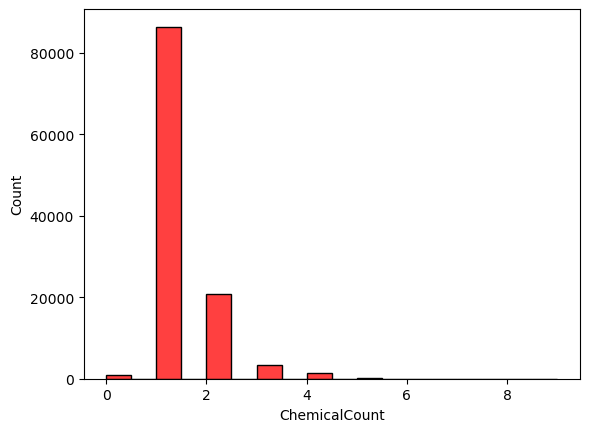

In [27]:
sns.histplot(df['ChemicalCount'], color='red')
plt.show() #wanted a visualization of how many chemicals each product contains.

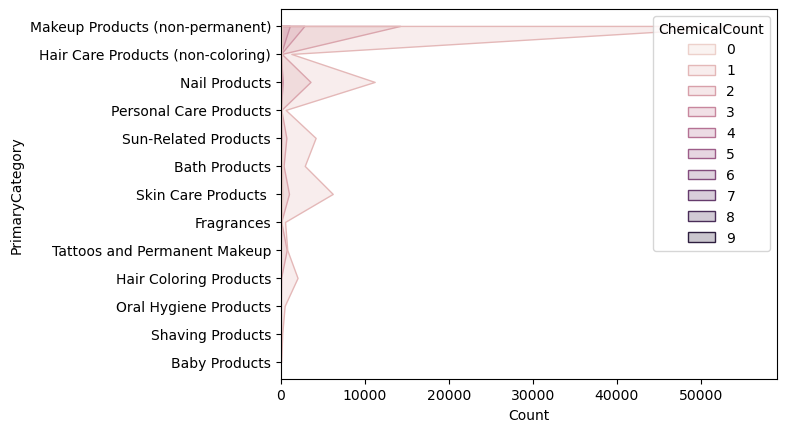

In [30]:
sns.histplot(data=df, y="PrimaryCategory", hue="ChemicalCount", element="poly")
plt.show() # I used a histplot to get a visualization of the chemicalcount for each category.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
       I was surprised to see that makeup products seem to have the most ChemicalCounts.  
2. Do you have any concerns about your dataset? 
       I am concerned about learning the toxicity of each chemical.  Also, how I am going to organize the data (how I can group by each product so all chemicals are listed under one row).
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
        There are null values that need to be addressed in the BrandName and CasNumber columns. There are duplicates in the dataset that also need to be addressed. I need to look into each chemical to determine if it is toxic or safe, then sort the data accordingly. 